In [1]:
import pandas as pd 
import numpy as np 
import math 
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
print('done')

done


In [2]:
Flight_delay = pd.read_csv('./Combined_Flights_2022.csv', index_col=0)
Flight_delay.head(5)

,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
FlightDate,,,,,,,,,,,,,,,,,,,,,
2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,1228.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,848.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,1636.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,1547.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,1251.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


In [3]:
Flight_delay.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4078318 entries, 2022-04-04 to 2022-03-07
Data columns (total 60 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   Airline                                  object 
 1   Origin                                   object 
 2   Dest                                     object 
 3   Cancelled                                bool   
 4   Diverted                                 bool   
 5   CRSDepTime                               int64  
 6   DepTime                                  float64
 7   DepDelayMinutes                          float64
 8   DepDelay                                 float64
 9   ArrTime                                  float64
 10  ArrDelayMinutes                          float64
 11  AirTime                                  float64
 12  CRSElapsedTime                           float64
 13  ActualElapsedTime                        float64
 14  Distance   

# Kiểu dữ liệu int64: 
- Year : Năm                                     
- Quarter : Quý                                    
- Month  : Tháng                                  
- DayofMonth :  Ngày trong tháng                           
- DayOfWeek   : NGày trong tuần                                
- DOT_ID_Marketing_Airline : Số nhận dạng do US DOT chỉ định để xác định một hãng hàng không (hãng vận chuyển) duy nhất
- Flight_Number_Marketing_Airline : Số hiệu chuyến bay
- DOT_ID_Operating_Airline: Số nhận dạng do US DOT chỉ định để xác định một hãng hàng không (hãng vận chuyển) duy nhất
- Flight_Number_Operating_Airline: số hiệu chuyến bay
- OriginAirportID: ID san bay xuat phat
- OriginAirportSeqID :ID san bay xuat phat và trung chuyển                       
- OriginCityMarketID: 
- OriginStateFips                          
- OriginWac: sân bay xuất phát (World Area Code)                             
- DestAirportID  
- DestAirportSeqID               
- DestCityMarketID                         
- DestStateFips: sân bay đích(state name)   
- DestWac: sân bay đích(World Area Code)                      
- CRSArrTime:hệ thống đặt trước chuyến bay
- DistanceGroup: Distance Intervals, every 250 Miles, for Flight Segment
- DivAirportLandings:Số lần hạ cánh tại sân bay chuyển hướng                        

# Kiểu dữ liệu float64 
- DepTime: Thời gian khởi hành thực tế                                  
- DepDelayMinutes: Số phút khởi hành bị trễ                          
- DepDelay: chênh lệch giữa thời gian khởi hành và chênh lẹch thực tế                                  
- ArrTime : Thời gian thực tế                                  
- ArrDelayMinutes:Sự khác biệt về số phút giữa thời gian đến theo lịch trình và thực tế. Số lượt đến sớm được đặt thành 0.                           
- AirTime: thời gian bay                                  
- CRSElapsedTime: thời gian máy bay bay (khong tính cất cánh) theo CRS                          
- ActualElapsedTime : Thời gian bay chính xác của chuyến bay                 
- Distance : Khoảng cách giữa các sân bay                        
- DepDel15: chuyến bay bị trễ 15 phút          
- DepartureDelayGroups: trì hoãn khởi hành    
- WheelsOff: Bánh xe máy bay ngừng quay                     
- WheelsOn:Bánh xe máy bay lăn bánh              
- TaxiIn: taxi đến kịp thời                       
- ArrDelay: sự chênh lệch giữa thời gian đến theo lịch trình và thực tế                             
- ArrDel15: máy bay đến trễ 15p                                 
- ArrivalDelayGroups : Khoảng thời gian đến trễ                 

# Kiểu object 
- Airline: hãng máy bay
- Origin: sân bay xuất phát                                   
- Dest: sân bay đích đến                                     
- Marketing_Airline_Network: Mã nhà cung cấp dịch vụ tiếp thị duy nhất                
- Operated_or_Branded_Code_Share_Partners: Báo cáo Đối tác chia sẻ mã thương hiệu hoặc nhà cung cấp dịch vụ vận hành  
- IATA_Code_Marketing_Airline: Mã do IATA chỉ định và thường được sử dụng để xác định nhà cung cấp dịch vụ              
- Operating_Airline: Mã nhà cung cấp dịch vụ duy nhất                        
- IATA_Code_Operating_Airline              
- Tail_Number:Số đuôi máy bay                               
- OriginCityName                           
- OriginState                              
- OriginStateName                          
- DestCityName                        
- DestState                                                           
- DestStateName                            
- DepTimeBlk: Khoảng thời gian bay được chỉ định                                   
- ArrTimeBlk: Khoảng thời gian đến được chỉ định                               

# Kiểu Bool 
- Cancelled : Cuyến bay bị hủy  
- Diverted  : Chuyển hướng máy bay                      




                                                                                                                                                                                                    

In [4]:
# ID và cac ma dinh danh
ID_col = ['TaxiIn','DOT_ID_Marketing_Airline',
          'Flight_Number_Marketing_Airline',
         'DOT_ID_Operating_Airline',
         'Flight_Number_Operating_Airline',
         'OriginAirportID',
         'OriginAirportSeqID',
         'OriginCityMarketID',
         'OriginStateFips',
         'OriginWac',
         'DestAirportID',
         'DestAirportSeqID',
         'DestCityMarketID',
         'DestStateFips',
         'DestWac',
         'IATA_Code_Marketing_Airline',
         'Operating_Airline',
         'IATA_Code_Operating_Airline',
         'Tail_Number',
         'DestState',
         'OriginState']


## Xóa các cột dữ liệu định dạng ID không có ý nghĩa với mô hình

In [5]:
df = Flight_delay.drop(ID_col,axis=1)
df

,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,...,TaxiOut,WheelsOff,WheelsOn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
FlightDate,,,,,,,,,,,,,,,,,,,,,
2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,1228.0,...,17.0,1140.0,1220.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,848.0,...,16.0,744.0,839.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,1636.0,...,21.0,1535.0,1622.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,1547.0,...,16.0,1446.0,1543.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,1251.0,...,19.0,1154.0,1243.0,1245,6.0,0.0,0.0,1200-1259,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,Republic Airlines,MSY,EWR,False,True,1949,2014.0,25.0,25.0,234.0,...,17.0,2031.0,202.0,2354,NaN,NaN,NaN,2300-2359,5,1
2022-03-17,Republic Airlines,CLT,EWR,True,False,1733,1817.0,44.0,44.0,NaN,...,NaN,NaN,NaN,1942,NaN,NaN,NaN,1900-1959,3,0
2022-03-08,Republic Airlines,ALB,ORD,False,False,1700,2318.0,378.0,378.0,59.0,...,19.0,2337.0,52.0,1838,381.0,1.0,12.0,1800-1859,3,0


# Xem định dạng dữ liệu và số dữ liệu missing 

In [6]:
print("Kich thuoc:")
print("Rows : ", df.shape[0])
print("Columns : ", df.shape[1])
# kiem tra o du lieu trong trong data
print("-"*75,"\n", "Du lieu trong: ","\n",
      df.isnull().sum().sort_values(ascending=False)) 

Kich thuoc:
Rows :  4078318
Columns :  39
--------------------------------------------------------------------------- 
 Du lieu trong:  
 AirTime                                    133402
ActualElapsedTime                          133402
ArrivalDelayGroups                         133402
ArrDel15                                   133402
ArrDelay                                   133402
ArrDelayMinutes                            133402
WheelsOn                                   124242
ArrTime                                    124239
WheelsOff                                  122666
TaxiOut                                    122666
DepDelayMinutes                            120495
DepartureDelayGroups                       120495
DepDel15                                   120495
DepDelay                                   120495
DepTime                                    120433
DepTimeBlk                                      0
DestStateName                                   0
Airline     

# Xử lý các dữ liệu giá trị âm

In [7]:
def convert(k):
    if k <= 0.0: 
        return 0
    else: 
        return 1
df["DepDelay"] = df["DepDelay"].apply(lambda x: convert(x));
df["ArrivalDelayGroups"] = df["ArrivalDelayGroups"].apply(lambda x: convert(x));
df["DepartureDelayGroups"] = df["DepartureDelayGroups"].apply(lambda x: convert(x));
df["ArrDelayMinutes"] = df["ArrDelayMinutes"].apply(lambda x: convert(x));
df["ArrDelay"] = df["ArrDelay"].apply(lambda x: convert(x));

Ta nhận thấy ý nghĩa của 2 cột dữ liệu 'DepDelay' và 'DepDelayMinutes', 'DepDel15' bị trùng về ý nghĩa, chúng đều biểu thị chuyến bay bị trễ nên ta sẽ xóa bỏ cột 'DepDelayMinutes'. 

In [8]:
df = df.drop(columns=['DepDelayMinutes','DepDel15'], axis=1)

## Mã hóa các biến category

In [9]:
df.columns

Index(['Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime',
       'DepTime', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime',
       'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter',
       'Month', 'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network',
       'Operated_or_Branded_Code_Share_Partners', 'OriginCityName',
       'OriginStateName', 'DestCityName', 'DestStateName',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups',
       'ArrTimeBlk', 'DistanceGroup', 'DivAirportLandings'],
      dtype='object')

In [10]:
catego_col = ['Airline','Origin','Dest','Marketing_Airline_Network','Operated_or_Branded_Code_Share_Partners','OriginCityName','OriginStateName','DestCityName','DestStateName','ArrTimeBlk']

In [11]:
pd.Series({c: df[c].unique() for c in df})

Airline                                    [Commutair Aka Champlain Enterprises, Inc., Go...
Origin                                     [GJT, HRL, DRO, IAH, DEN, TYS, MOB, LNK, BHM, ...
Dest                                       [DEN, IAH, GPT, TUL, LCH, AEX, MOB, CPR, OKC, ...
Cancelled                                                                      [False, True]
Diverted                                                                       [False, True]
CRSDepTime                                 [1133, 732, 1529, 1435, 1135, 955, 2139, 1129,...
DepTime                                    [1123.0, 728.0, 1514.0, 1430.0, 1135.0, 952.0,...
DepDelay                                                                              [0, 1]
ArrTime                                    [1228.0, 848.0, 1636.0, 1547.0, 1251.0, 1238.0...
ArrDelayMinutes                                                                       [0, 1]
AirTime                                    [40.0, 55.0, 47.0, 57.0, 49

In [12]:
df.head()

,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelay,ArrTime,ArrDelayMinutes,...,TaxiOut,WheelsOff,WheelsOn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
FlightDate,,,,,,,,,,,,,,,,,,,,,
2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0,1228.0,0,...,17.0,1140.0,1220.0,1245,0,0.0,0,1200-1259,1,0
2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0,848.0,0,...,16.0,744.0,839.0,849,0,0.0,0,0800-0859,2,0
2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0,1636.0,0,...,21.0,1535.0,1622.0,1639,0,0.0,0,1600-1659,2,0
2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0,1547.0,0,...,16.0,1446.0,1543.0,1605,0,0.0,0,1600-1659,2,0
2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0,1251.0,1,...,19.0,1154.0,1243.0,1245,1,0.0,0,1200-1259,2,0


In [13]:
df['Airline'] = df['Airline'].astype('category')
df['Airline'] = df['Airline'].cat.codes
#################
df['Origin'] = df['Origin'].astype('category')
df['Origin'] = df['Origin'].cat.codes
##############
df['Dest'] = df['Dest'].astype('category')
df['Dest'] = df['Dest'].cat.codes
#############
df['Marketing_Airline_Network'] = df['Marketing_Airline_Network'].astype('category')
df['Marketing_Airline_Network'] = df['Marketing_Airline_Network'].cat.codes
#############
df['Operated_or_Branded_Code_Share_Partners'] = df['Operated_or_Branded_Code_Share_Partners'].astype('category')
df['Operated_or_Branded_Code_Share_Partners'] = df['Operated_or_Branded_Code_Share_Partners'].cat.codes
#############
df['OriginCityName'] = df['OriginCityName'].astype('category')
df['OriginCityName'] = df['OriginCityName'].cat.codes
##############
df['OriginStateName'] = df['OriginStateName'].astype('category')
df['OriginStateName'] = df['OriginStateName'].cat.codes
##############
df['DestCityName'] = df['DestCityName'].astype('category')
df['DestCityName'] = df['DestCityName'].cat.codes
#############
df['DestStateName'] = df['DestStateName'].astype('category')
df['DestStateName'] = df['DestStateName'].cat.codes
#############
df['ArrTimeBlk'] = df['ArrTimeBlk'].astype('category')
df['ArrTimeBlk'] = df['ArrTimeBlk'].cat.codes
############
df['Cancelled'] = df['Cancelled'].astype('category')
df['Cancelled'] = df['Cancelled'].cat.codes
######################
df['Diverted'] = df['Diverted'].astype('category')
df['Diverted'] = df['Diverted'].cat.codes
###############
df['DepTimeBlk'] = df['DepTimeBlk'].astype('category')
df['DepTimeBlk'] = df['DepTimeBlk'].cat.codes

In [14]:
type(df["ArrDelayMinutes"])

pandas.core.series.Series

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4078318 entries, 2022-04-04 to 2022-03-07
Data columns (total 37 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   Airline                                  int8   
 1   Origin                                   int16  
 2   Dest                                     int16  
 3   Cancelled                                int8   
 4   Diverted                                 int8   
 5   CRSDepTime                               int64  
 6   DepTime                                  float64
 7   DepDelay                                 int64  
 8   ArrTime                                  float64
 9   ArrDelayMinutes                          int64  
 10  AirTime                                  float64
 11  CRSElapsedTime                           float64
 12  ActualElapsedTime                        float64
 13  Distance                                 float64
 14  Year       

## Xử lý các giá trị trống 

In [16]:
df.isna().sum()

Airline                                         0
Origin                                          0
Dest                                            0
Cancelled                                       0
Diverted                                        0
CRSDepTime                                      0
DepTime                                    120433
DepDelay                                        0
ArrTime                                    124239
ArrDelayMinutes                                 0
AirTime                                    133402
CRSElapsedTime                                  0
ActualElapsedTime                          133402
Distance                                        0
Year                                            0
Quarter                                         0
Month                                           0
DayofMonth                                      0
DayOfWeek                                       0
Marketing_Airline_Network                       0


In [17]:
#thay cac gia tri trong boi cac gia tri trung binh cua bien
df.DepTime.fillna(df.DepTime.mean(), inplace=True)
df.ArrTime.fillna(df.ArrTime.mean(), inplace=True)
df.ArrDelayMinutes.fillna(df.ArrDelayMinutes.mean(), inplace=True)
df.AirTime.fillna(df.AirTime.mean(), inplace=True)
df.ActualElapsedTime.fillna(df.ActualElapsedTime.mean(), inplace=True)
df.TaxiOut.fillna(df.TaxiOut.mean(), inplace=True)
df.WheelsOff.fillna(df.WheelsOff.mean(), inplace=True)
df.ArrDelay.fillna(df.ArrDelay.mean(), inplace=True)
df.ArrDel15.fillna(df.ArrDel15.mean(), inplace=True)
df.ArrivalDelayGroups.fillna(df.ArrivalDelayGroups.mean(), inplace=True)
df.WheelsOn.fillna(df.WheelsOn.mean(), inplace=True)

In [18]:
df.isnull().sum()

Airline                                    0
Origin                                     0
Dest                                       0
Cancelled                                  0
Diverted                                   0
CRSDepTime                                 0
DepTime                                    0
DepDelay                                   0
ArrTime                                    0
ArrDelayMinutes                            0
AirTime                                    0
CRSElapsedTime                             0
ActualElapsedTime                          0
Distance                                   0
Year                                       0
Quarter                                    0
Month                                      0
DayofMonth                                 0
DayOfWeek                                  0
Marketing_Airline_Network                  0
Operated_or_Branded_Code_Share_Partners    0
OriginCityName                             0
OriginStat

## Trực quan hóa dữ liệu bằng biểu đồ và đánh giá các biến có nhiều giá trị ngoại lai

In [19]:
bool_columns = []
for col in df.columns:
    if df[col].nunique()<3:
        bool_columns.append(col)

Num_col = []
for i in df.columns: 
    if i not in bool_columns and i not in catego_col:
        Num_col.append(i)

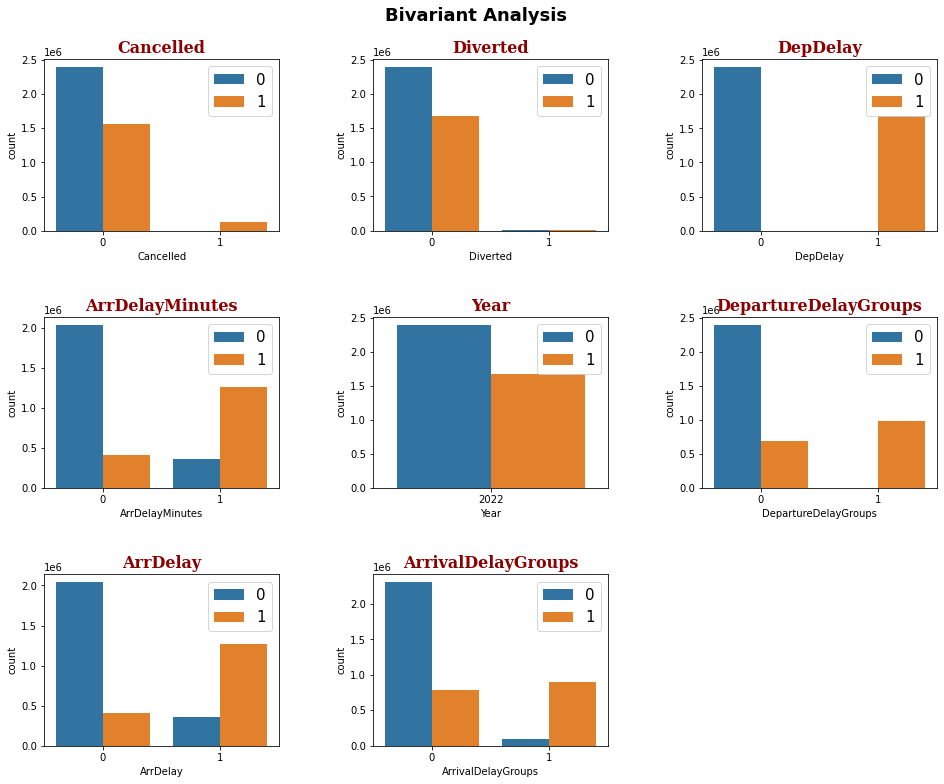

In [20]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariant Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(bool_columns):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.countplot(x = df[col] , ax=a , hue = df['DepDelay'] )
    a.set_title(col , fontdict={'family': 'serif','color':  'darkred','weight': 'bold','size': 16})
    a.legend(fontsize=15)
plt.savefig('./fig/Bivariant_Analysis.png')

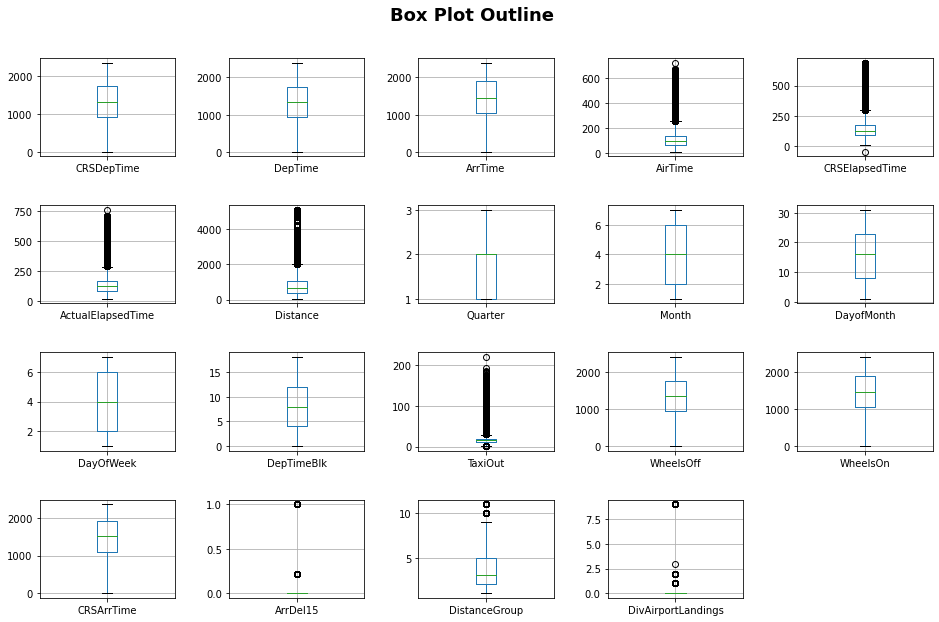

In [21]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Box Plot Outline', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_col):
    a = fig.add_subplot(5, 5, i+1)
    box_plot=df.boxplot(col)
plt.savefig('./fig/Box_Plot_Outline.png')

Ta cần chuẩn hóa lại các giá trị ở các trường dữ liệu do có các giá trị OutLines bằng phương pháp sử dụng khoảng tứ phân vị (IQR - Interquartile Range)

In [22]:
# xu ly gia tri ngoai lai
dict = {}
for col in Num_col:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit

for col in Num_col:
    df[col] = np.where(
        df[col] > dict['upper_limit_' + col],
        dict['upper_limit_' + col],
        np.where(
            df[col] < dict['lower_limit_' + col],
            dict['lower_limit_' + col],
            df[col]  
        )
    )

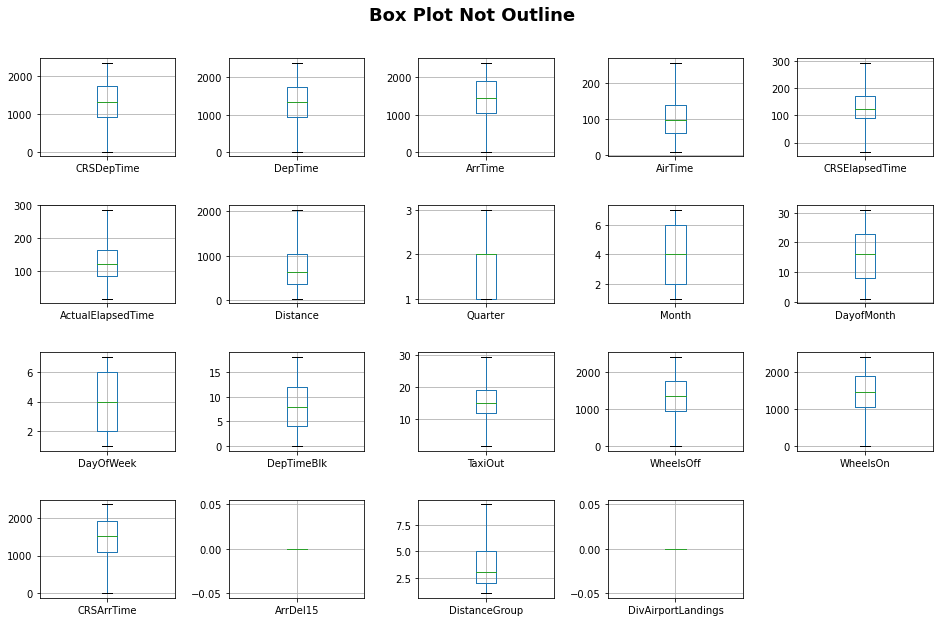

In [23]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Box Plot Not Outline', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_col):
    a = fig.add_subplot(5, 5, i+1)
    box_plot=df.boxplot(col)
plt.savefig('./fig/Box_Plot_NotOutline.png')

### Xét tương quan các biến

In [24]:
correlation = []
for col in Num_col:
    corr = df[col].corr(df['DepDelay'])
    correlation.append(corr)
    print('He so tuong quan giua '+col+' va DepDelay la: ', corr)

He so tuong quan giua CRSDepTime va DepDelay la:  0.1869808743283894
He so tuong quan giua DepTime va DepDelay la:  0.2221636603440186
He so tuong quan giua ArrTime va DepDelay la:  0.11011914684991114
He so tuong quan giua AirTime va DepDelay la:  0.07736120146903257
He so tuong quan giua CRSElapsedTime va DepDelay la:  0.0680012088965457
He so tuong quan giua ActualElapsedTime va DepDelay la:  0.07506138429478583
He so tuong quan giua Distance va DepDelay la:  0.07798661629890988
He so tuong quan giua Quarter va DepDelay la:  0.023147649454494084
He so tuong quan giua Month va DepDelay la:  0.029938213241879317
He so tuong quan giua DayofMonth va DepDelay la:  -0.019558784807029873
He so tuong quan giua DayOfWeek va DepDelay la:  0.052864366297629854
He so tuong quan giua DepTimeBlk va DepDelay la:  0.18787254704342174
He so tuong quan giua TaxiOut va DepDelay la:  0.005421883283318168
He so tuong quan giua WheelsOff va DepDelay la:  0.21399737074812872
He so tuong quan giua WheelsOn

Ta có thể thấy hai biến 'ArrDel15'và 'DivAirportLandings' không có ý nghĩa trong bộ dữ liệu, cùng với đó 'TaxiOut' có hệ số tương quan quá bé nên ta sẽ loại bỏ ba gía trị này cùng với biến mục tiêu cho tập huấn luyện đầu vào X trong mô hình.

In [25]:
X = df.drop(['DepDelay','ArrDel15','DivAirportLandings','TaxiOut'], axis=1)
y = df['DepDelay']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, classification_report

In [28]:
def models_clf(X_train, y_train, X_test, y_test, model, models_names): 
  print(models_names)  
  print(classification_report(y_test, model.predict(X_test)))
  confusion_matrix(y_test, model.predict(X_test))
  cm = confusion_matrix(y_test, model.predict(X_test))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Delay", "Delay"])
  disp.plot(cmap=plt.cm.Greens)
  disp.ax_.set_title('Confusion matrix of'+ models_names +'model')
  plt.show()

In [29]:
logr = LogisticRegression()
logr.fit(X_train, y_train)
Pre = logr.predict(X_test)

c:\users\ad\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
              precision    recall  f1-score   support

           0       0.67      0.84      0.74    480400
           1       0.63      0.39      0.49    335264

    accuracy                           0.66    815664
   macro avg       0.65      0.62      0.61    815664
weighted avg       0.65      0.66      0.64    815664



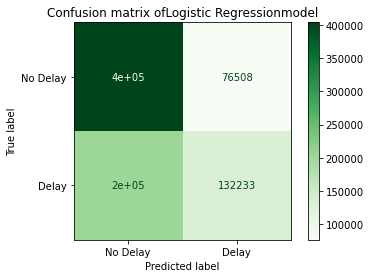

In [30]:
models_clf(X_train, y_train, X_test, y_test, logr, "Logistic Regression")

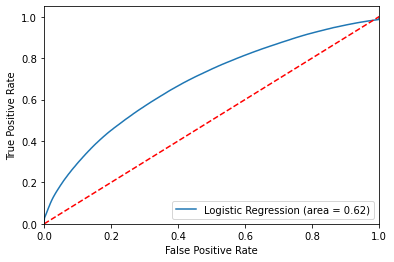

In [31]:
logit_roc_auc = roc_auc_score(y_test, logr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('./fig/Log_ROC.png')
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',max_depth=20,random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [33]:
#kiem tra overfiting
print('Training set score: {:.4f}'.format(dt.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))

Training set score: 0.9038
Test set score: 0.8949


Decision Tree Classifier with CART
              precision    recall  f1-score   support

           0       0.86      0.98      0.92    480400
           1       0.96      0.77      0.86    335264

    accuracy                           0.89    815664
   macro avg       0.91      0.88      0.89    815664
weighted avg       0.90      0.89      0.89    815664



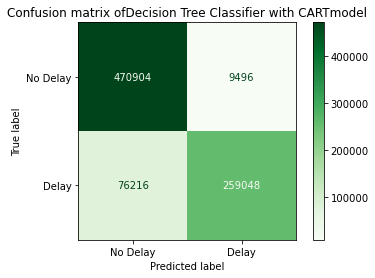

In [34]:
models_clf(X_train, y_train, X_test, y_test, dt, "Decision Tree Classifier with CART")

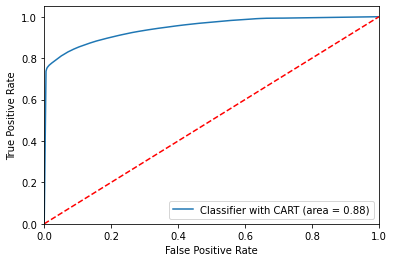

In [35]:
CART_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Classifier with CART (area = %0.2f)' % CART_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('./fig/CART_ROC.png')
plt.show()

In [36]:
df.head(10)

,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelay,ArrTime,ArrDelayMinutes,...,TaxiOut,WheelsOff,WheelsOn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
FlightDate,,,,,,,,,,,,,,,,,,,,,
2022-04-04,6,141,97,0,0,1133.0,1123.0,0,1228.0,0,...,17.0,1140.0,1220.0,1245.0,0,0.0,0,7,1.0,0.0
2022-04-04,6,164,171,0,0,732.0,728.0,0,848.0,0,...,16.0,744.0,839.0,849.0,0,0.0,0,3,2.0,0.0
2022-04-04,6,103,97,0,0,1529.0,1514.0,0,1636.0,0,...,21.0,1535.0,1622.0,1639.0,0,0.0,0,11,2.0,0.0
2022-04-04,6,171,143,0,0,1435.0,1430.0,0,1547.0,0,...,16.0,1446.0,1543.0,1605.0,0,0.0,0,11,2.0,0.0
2022-04-04,6,103,97,0,0,1135.0,1135.0,0,1251.0,1,...,19.0,1154.0,1243.0,1245.0,1,0.0,0,7,2.0,0.0
2022-04-04,6,97,356,0,0,955.0,952.0,0,1238.0,0,...,25.0,1017.0,1234.0,1240.0,0,0.0,0,7,3.0,0.0
2022-04-04,6,171,201,0,0,2139.0,2136.0,0,2218.0,0,...,11.0,2147.0,2213.0,2231.0,0,0.0,0,17,1.0,0.0
2022-04-04,6,362,171,0,0,1129.0,1117.0,0,1311.0,1,...,22.0,1139.0,1255.0,1306.0,1,0.0,0,8,4.0,0.0
2022-04-04,6,171,11,0,0,1424.0,1414.0,0,1513.0,0,...,16.0,1430.0,1507.0,1524.0,0,0.0,0,10,1.0,0.0
